In [60]:
import re
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch, FontManager

In [3]:
#Request to the url to extract the data
url = 'https://1xbet.whoscored.com/Matches/1434353/Live/International-European-Championship-2020-Belgium-Russia'
headers={
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
    "cache-control": "max-age=0",
    "cookie": "visid_incap_774906=tXRe991uSmqky17Bbg1uorSnw2AAAAAAQUIPAAAAAAAheP61SgpwNlY9MR/gia7Z; _ga=GA1.2.383133876.1623435209; _gid=GA1.2.997420422.1623435209; _fbp=fb.1.1623435209742.1363854690; __qca=P0-582197872-1623435209714; _pbjs_userid_consent_data=3524755945110770; _pubcid=c2506e75-6c12-4bca-acd5-2d7735654038; _xpid=2467697996; _xpkey=5N0a6jQLCLcGd5MFvog28NH5k50ofKhp; _lr_env_src_ats=false; _unifiedid=%7B%22TDID%22%3A%225dc494e0-d1f2-4529-a9ac-616d90d2b8eb%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222021-05-11T17%3A24%3A00%22%7D; _ga=GA1.3.383133876.1623435209; _gid=GA1.3.997420422.1623435209; __gads=ID=c0b26794b121f4ea:T=1623439574:S=ALNI_MauwdKnMXn7CT89RinECoUbviRd7g; visid_incap_774904=gXKcouyQTeSywMW07IXh79a4w2AAAAAAQUIPAAAAAABNvT/DgvVBv4Ia1m1NtiwK; incap_ses_707_774906=/GxZEz8X+VX2Q6SHJ8XPCXlxxGAAAAAAijkSoX1cYZkHStUXa/V2hw==; incap_ses_707_774904=+JssSnnzHW3rRaSHJ8XPCYNxxGAAAAAA74seP3RhmlFWWBH5+a0UJA==; incap_ses_709_774906=3mxSbGK4NWyYBM/VFuDWCQXdxGAAAAAAbmuUGWM+9BRNsFFaXUmtIw==; incap_ses_709_774904=tH1KNuhHtUTSBM/VFuDWCQfdxGAAAAAAV3Yu3ap+2nhdHMWCIQJICg==; incap_ses_705_774906=tnFrLbvtHgFIPkCLM6rICROqxWAAAAAA0i8W8cvGE3JQQD7H/URykA==; _lr_retry_request=true; incap_ses_705_774904=vsVmCsWf60xiP0CLM6rICRiqxWAAAAAA5X2QUeaXFf35vUCL1eXGSg==",
    "referer": "https://1xbet.whoscored.com/",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "same-origin",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
}
response = requests.get(url,headers=headers)

TypeError: object of type 'Response' has no len()

In [5]:
#fetch the event data using regex
event_data = re.search(r'matchCentreData: (.*?),\r', response.text).group(1)

json_event_data = json.loads(event_data)

events = json_event_data['events']
events_df = pd.DataFrame(events)

#save a csv to local
events_df.to_csv('Belgium-Russia.csv')

In [122]:
#copy
df = events_df.copy()

In [123]:
#player name is used by maping in webpage so we need to map also by fetching player dictionary
player_data = re.search(r'playerIdNameDictionary":(.*?)}', response.text).group(1)
player_data = player_data+'}'

players = json.loads(player_data)

In [124]:
#same with teams
team_data = re.search(r'input: (.*?)\r', response.text).group(1)
team_data = team_data.replace(',,','')
team_data = team_data.replace("'",'"')
team_data_json = json.loads(team_data)
teams = {}
teams[team_data_json[0]] = team_data_json[2]
teams[team_data_json[1]] = team_data_json[3]

In [125]:
#to view full rows
pd.pandas.set_option('display.max_columns',None)

In [126]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY
0,2.306007e+09,2,0,0.0,326,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.306007e+09,3,0,0.0,339,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.306007e+09,3,0,1.0,326,50.2,49.9,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[90, 116, 29, 34, 36, 214, 217]",True,244560.0,30.5,59.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.306007e+09,4,0,5.0,326,31.9,57.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[90, 119, 123, 127, 35, 37, 216, 217]",True,285661.0,77.6,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.306007e+09,4,0,7.0,339,24.5,88.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 285, 'displayName': 'Defen...","[196, 199]",False,21778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2.306021e+09,716,92,0.0,326,0.0,0.0,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1636,2.306021e+09,717,0,0.0,326,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,2.306021e+09,1091,0,0.0,339,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,2.306005e+09,2,0,0.0,339,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 131, 'displayName': 'TeamP...",[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#fuction to conver string to dict inside column
def string_to_dict(dict_string):
    return dict_string
#     dict_string = dict_string.replace("'", '"').replace('u"', '"')
#     return json.loads(dict_string)

In [128]:
#create new columns type and outcome
df.type = df.type.apply(string_to_dict)
df['type'] = df['type'].apply(lambda x: x.get('displayName'))
df.outcomeType = df.outcomeType.apply(string_to_dict)
df['outcome'] = df['outcomeType'].apply(lambda x: x.get('displayName'))

In [129]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,outcome
0,2.306007e+09,2,0,0.0,326,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Start,"{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
1,2.306007e+09,3,0,0.0,339,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Start,"{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
2,2.306007e+09,3,0,1.0,326,50.2,49.9,0,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[90, 116, 29, 34, 36, 214, 217]",True,244560.0,30.5,59.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
3,2.306007e+09,4,0,5.0,326,31.9,57.3,0,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[90, 119, 123, 127, 35, 37, 216, 217]",True,285661.0,77.6,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful
4,2.306007e+09,4,0,7.0,339,24.5,88.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Aerial,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 285, 'displayName': 'Defen...","[196, 199]",False,21778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2.306021e+09,716,92,0.0,326,0.0,0.0,97,"{'value': 2, 'displayName': 'SecondHalf'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
1636,2.306021e+09,717,0,0.0,326,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
1637,2.306021e+09,1091,0,0.0,339,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful
1638,2.306005e+09,2,0,0.0,339,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}",FormationSet,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 131, 'displayName': 'TeamP...",[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful


In [130]:
#replace player id with names
df['playerId'] = df['playerId'].apply(pd.to_numeric,errors='ignore')
df['playerId'] = df['playerId'].astype(str)
df['playerId'] = df['playerId'].apply(lambda x:x.replace('.0',''))
df["player"] = df["playerId"].map(players)

In [131]:
#same with teams
df['teamId'] = df['teamId']
df["team"] = df["teamId"].map(teams)
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,outcome,player,team
0,2.306007e+09,2,0,0.0,326,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Start,"{'value': 1, 'displayName': 'Successful'}",[],[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Russia
1,2.306007e+09,3,0,0.0,339,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Start,"{'value': 1, 'displayName': 'Successful'}",[],[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Belgium
2,2.306007e+09,3,0,1.0,326,50.2,49.9,0,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[90, 116, 29, 34, 36, 214, 217]",True,244560,30.5,59.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Aleksandr Golovin,Russia
3,2.306007e+09,4,0,5.0,326,31.9,57.3,0,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[90, 119, 123, 127, 35, 37, 216, 217]",True,285661,77.6,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful,Georgi Dzhikiya,Russia
4,2.306007e+09,4,0,7.0,339,24.5,88.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Aerial,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 285, 'displayName': 'Defen...","[196, 199]",False,21778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Jan Vertonghen,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2.306021e+09,716,92,0.0,326,0.0,0.0,97,"{'value': 2, 'displayName': 'SecondHalf'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Russia
1636,2.306021e+09,717,0,0.0,326,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Russia
1637,2.306021e+09,1091,0,0.0,339,0.0,0.0,7,"{'value': 14, 'displayName': 'PostGame'}",End,"{'value': 1, 'displayName': 'Successful'}",[],[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Belgium
1638,2.306005e+09,2,0,0.0,339,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}",FormationSet,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 131, 'displayName': 'TeamP...",[],False,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,NaN,Belgium


In [132]:
df[df['player']=='Romelu Lukaku']

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,outcome,player,team
14,2.306007e+09,10,0,31.0,339,37.4,58.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",Aerial,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 285, 'displayName': 'Defen...","[197, 199]",False,78498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium
144,2.306008e+09,115,9,5.0,339,74.9,34.8,9,"{'value': 1, 'displayName': 'FirstHalf'}",BallTouch,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 68]",True,78498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium
155,2.306008e+09,121,9,31.0,339,88.6,54.2,9,"{'value': 1, 'displayName': 'FirstHalf'}",Goal,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 23, 8, 9, 201, 1, 3, 12, 16, 18, 25]",True,78498,NaN,NaN,5.1,46.7,True,True,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium
188,2.306008e+09,141,11,49.0,339,66.8,28.2,11,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[90, 119, 28, 123, 129, 35, 36, 216, 217]",True,78498,90.2,51.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium
299,2.306009e+09,187,17,46.0,339,47.2,51.2,17,"{'value': 1, 'displayName': 'FirstHalf'}",BallRecovery,"{'value': 1, 'displayName': 'Successful'}",[],[92],False,78498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium
300,2.306009e+09,188,17,51.0,339,86.4,38.2,17,"{'value': 1, 'displayName': 'FirstHalf'}",TakeOn,"{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 233, 'displayName': 'Oppos...","[90, 52]",True,78498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium
302,2.306009e+09,189,17,55.0,339,97.0,27.6,17,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 210, 'displayName': 'ShotA...","[90, 118, 116, 29, 122, 204, 39, 45, 34, 36, 2...",True,78498,86.2,45.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium
358,2.306010e+09,230,20,33.0,339,77.3,29.1,20,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 212, 'displayName': 'Lengt...","[90, 118, 116, 29, 204, 34, 37, 216, 217]",True,78498,70.5,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium
383,2.306010e+09,246,21,21.0,339,78.5,15.3,21,"{'value': 1, 'displayName': 'FirstHalf'}",TakeOn,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 53]",True,78498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium
384,2.306010e+09,247,21,25.0,339,86.6,32.2,21,"{'value': 1, 'displayName': 'FirstHalf'}",Pass,"{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[90, 118, 116, 29, 204, 34, 36, 216, 217]",True,78498,84.7,46.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Successful,Romelu Lukaku,Belgium


In [133]:
#scale to pitch size (120,80)
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8
df['goalMouthY'] = df['goalMouthY']*.8

In [134]:
final_df = df[['id','eventId','minute','second','x','y','type','endX','endY','outcome','player','team','goalMouthY']]

In [155]:
final_df['goalMouthX'] = 120
final_df['endY'] = 80-final_df['endY']

/home/user/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/user/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
final_df['y'] = 80-final_df['y']

/home/user/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
final_df['goalMouthY'] = 80-final_df['goalMouthY']

/home/user/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
# lukaku_pass_df = final_df[(final_df['player']=='Romelu Lukaku') &(final_df['type']=='Pass')]
lukaku_pass_df = final_df[(final_df['player']=='Romelu Lukaku')]

In [159]:
lukaku_pass_df.reset_index()

,index,id,eventId,minute,second,x,y,type,endX,endY,outcome,player,team,goalMouthY,goalMouthX
0,14,2.306007e+09,10,0,31.0,44.88,33.60,Aerial,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium,NaN,120
1,144,2.306008e+09,115,9,5.0,89.88,52.16,BallTouch,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium,NaN,120
2,155,2.306008e+09,121,9,31.0,106.32,36.64,Goal,NaN,NaN,Successful,Romelu Lukaku,Belgium,42.64,120
3,188,2.306008e+09,141,11,49.0,80.16,57.44,Pass,108.24,39.04,Unsuccessful,Romelu Lukaku,Belgium,NaN,120
4,299,2.306009e+09,187,17,46.0,56.64,39.04,BallRecovery,NaN,NaN,Successful,Romelu Lukaku,Belgium,NaN,120
5,300,2.306009e+09,188,17,51.0,103.68,49.44,TakeOn,NaN,NaN,Unsuccessful,Romelu Lukaku,Belgium,NaN,120
6,302,2.306009e+09,189,17,55.0,116.40,57.92,Pass,103.44,43.36,Successful,Romelu Lukaku,Belgium,NaN,120
7,358,2.306010e+09,230,20,33.0,92.76,56.72,Pass,84.60,58.64,Successful,Romelu Lukaku,Belgium,NaN,120
8,383,2.306010e+09,246,21,21.0,94.20,67.76,TakeOn,NaN,NaN,Successful,Romelu Lukaku,Belgium,NaN,120
9,384,2.306010e+09,247,21,25.0,103.92,54.24,Pass,101.64,42.72,Successful,Romelu Lukaku,Belgium,NaN,120


In [160]:
lukaku_pass_df.groupby('outcome').count()

,id,eventId,minute,second,x,y,type,endX,endY,player,team,goalMouthY,goalMouthX
outcome,,,,,,,,,,,,,
Successful,24,24,24,24,24,24,24,14,14,24,24,3,24
Unsuccessful,14,14,14,14,14,14,14,3,3,14,14,0,14


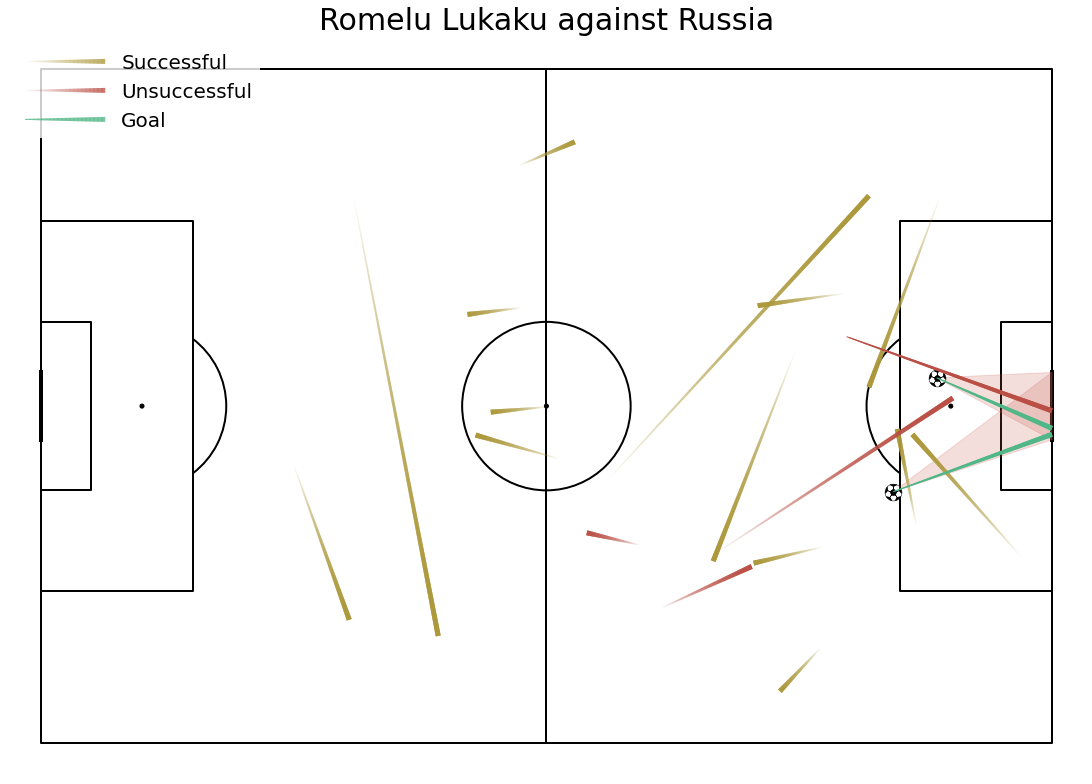

In [165]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('white')

# Plot the successful passes
outcome_successful = lukaku_pass_df[lukaku_pass_df['outcome'] == 'Successful']
lc1 = pitch.lines(outcome_successful.x, outcome_successful.y,
                  outcome_successful.endX, outcome_successful.endY,
                  lw=5, transparent=True, comet=True, label='Successful',
                  color='#ad993c', ax=ax)

# Plot the unsuccessful passes
outcome_unsuccessful = lukaku_pass_df[lukaku_pass_df['outcome'] == 'Unsuccessful']
lc2 = pitch.lines(outcome_unsuccessful.x, outcome_unsuccessful.y,
                  outcome_unsuccessful.endX, outcome_unsuccessful.endY,
                  lw=5, transparent=True, comet=True, label='Unsuccessful',
                  color='#ba4f45', ax=ax)

outcome_goal = lukaku_pass_df[lukaku_pass_df['type'] == 'Goal']
sc3 = pitch.scatter(outcome_goal.x, outcome_goal.y, marker='football',
                    s=300, ax=ax, zorder=1.2)
lc3 = pitch.goal_angle(outcome_goal.x, outcome_goal.y,ax=ax, alpha=0.2, zorder=1.1,color='#cb5a4c', goal='right')
line = pitch.lines(outcome_goal.x, outcome_goal.y,
                   outcome_goal.goalMouthX, outcome_goal.goalMouthY, comet=True,
                   label='Goal', color='#52b788', ax=ax)


saved_shot = lukaku_pass_df[lukaku_pass_df['type'] == 'SavedShot']
# sc4 = pitch.scatter(saved_shot.x, saved_shot.y, marker='football',
#                     s=300, ax=ax, zorder=1.2)
# lc4 = pitch.goal_angle(saved_shot.x, saved_shot.y,ax=ax, alpha=0.2, zorder=1.1,color='#cb5a4c', goal='right')
line4 = pitch.lines(saved_shot.x, saved_shot.y,
                   saved_shot.goalMouthX, saved_shot.goalMouthY, comet=True, color='#ba4f45', ax=ax)
# Plot the legend
ax.legend(facecolor='white', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax.set_title('Romelu Lukaku against Russia', fontsize=30)
fig.savefig('Romelu Lukaku against Russia.png',dpi=500)